In [11]:
import numpy as np
import pandas as pd
import seaborn as sns

# An Analysis of the Lower Half and its Relation to Pitch Speed

This notebook explores the analysis of lower half biomechanics in baseball, shedding light on the relation of lower body movement and enhancing baseball performance. For this analysis, there will be an exploration into ground reaction forces on the back leg, the velocity of center of gravity, momentum, and the ground reaction forces on the lead leg as well as their relation to pitch speed.

## The Data

The data used for this analysis came from the [Driveline OpenBiomechanics Project](https://www.openbiomechanics.org/). The specific data for this analysis will use only the point of interest from the pitching data provided by the OBP.

### Load the data into a pandas DataFrame

In [2]:
data = pd.read_csv("./data/poi_metrics.csv")

### Describe the data

In [5]:
data

,session_pitch,session,p_throws,pitch_type,pitch_speed_mph,max_shoulder_internal_rotational_velo,max_elbow_extension_velo,max_torso_rotational_velo,max_rotation_hip_shoulder_separation,max_elbow_flexion,...,rear_grf_z_max,rear_grf_mag_max,rear_grf_angle_at_max,lead_grf_x_max,lead_grf_y_max,lead_grf_z_max,lead_grf_mag_max,lead_grf_angle_at_max,peak_rfd_rear,peak_rfd_lead
0,1031_2,1031,R,FF,90.4,4533.2480,2445.8177,958.0878,32.3152,109.9971,...,1497.9859,1736.0368,55.7071,1278.4966,270.7849,2484.8747,2782.9580,63.3501,11.6564,170.4620
1,1031_3,1031,R,FF,90.4,4571.1735,2389.5438,969.5766,32.5547,109.1065,...,1502.8258,1728.0176,60.2863,1436.1255,252.1999,2690.7521,3038.8913,62.3087,9.5715,183.6636
2,1097_1,1097,R,FF,77.6,4165.3055,2426.3029,1090.2269,33.1477,123.4752,...,1094.7686,1283.0751,58.3164,957.3923,245.4411,1767.4604,2010.5341,61.5594,4.4432,52.9333
3,1097_2,1097,R,FF,77.0,3832.1715,2424.0493,1105.2275,27.9286,124.6578,...,1187.5810,1354.7150,58.7397,860.3796,280.5177,1715.1864,1864.0488,66.6789,6.4897,54.3727
4,1097_3,1097,R,FF,76.1,3970.7971,2497.6253,1110.4850,28.9909,124.8308,...,1214.0065,1425.2124,58.0297,1066.6047,337.4227,2120.4510,2283.1749,65.9014,7.2019,106.2719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,3252_1,3252,R,FF,80.8,4494.0446,2759.7142,1129.4168,42.9000,123.5448,...,1315.2310,1469.9282,62.5808,864.8566,141.5886,1685.4288,1891.2377,63.0494,6307.8100,72742.9029
407,3252_2,3252,R,FF,80.8,4550.4618,2742.8536,1129.4417,43.5008,123.5490,...,1246.7301,1418.5732,60.7799,921.8930,104.1382,1708.8564,1932.4776,61.7749,7850.2644,77906.1103
408,3252_3,3252,R,FF,80.8,4580.0385,2796.3719,1133.8676,43.7838,125.6560,...,1278.0224,1470.2659,60.8819,874.7938,86.2704,1647.5457,1858.1106,62.8667,16303.1697,77777.3331
409,3252_4,3252,R,FF,83.3,4638.4414,2815.9331,1119.5235,43.0352,127.5534,...,1254.4113,1414.2349,63.4549,841.1043,117.9198,1658.6645,1863.5780,63.3718,11758.9779,77382.0300


The data for this analysis has 411 pitches and 81 features describing each pitch.

## The Analysis

The rest of the notebook will be analyzing lower half biomechanics and a short passages relaying what the data is explaining.

### Rear Leg Ground Reaction Force (GRF) and Pitch Speed

The first relation to be analyzed will be rear leg ground reaction force and pitch speed. The rear leg in reference is the leg that is in contact with the rubber during the delivery. This will be the same leg as the handness of the pitcher. For example, the rear leg for a right handed pitcher will be the right leg.  Rear leg ground reaction force describes the amount of force exerted by the ground on the rear leg. Lastly, pitch speed is the speed of the baseball as it leaves the hand measured in miles per hour(mph).

Here is a graph showing the relation between the magnitude of grf on the rear leg (N) and pitch speed (mph). The magnitude is the total amount of force acting on the rear leg from the ground.

[Text(0.5, 0, 'Max Mag Rear Leg GRF (N)'),
 Text(0, 0.5, 'Pitch Speed (mph)'),
 Text(0.5, 1.0, 'Max Mag Rear Leg GRF (N) vs Pitch Speed (mph)')]

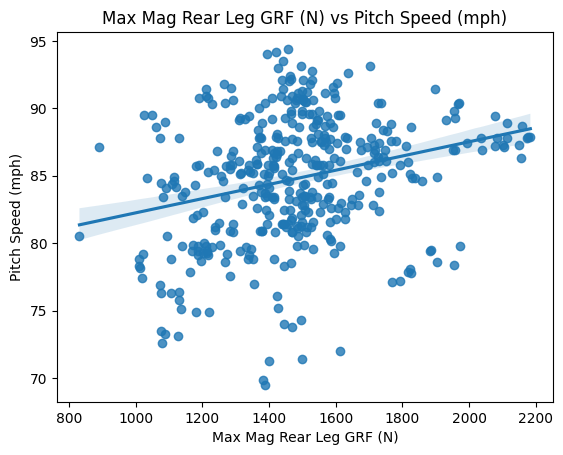

In [18]:
p = sns.regplot(x="rear_grf_mag_max", y="pitch_speed_mph", data=data)
p.set(xlabel ="Max Mag Rear Leg GRF (N)", ylabel = "Pitch Speed (mph)", title =f"Max Mag Rear Leg GRF (N) vs Pitch Speed (mph)")

The graph above shows a positive relation between the max mag rear leg grf and pitch speed. This means that as the amount of grf increases, so does the pitch speed. Yet, there does not seem to be a large increase. A question arises with further investigation: would there be a larger increase in pitch speed if the force were directed towards the plate?

Let's now answer that question. The following will analyze the relationship between the rear leg grf towards the plate (N) and pitch speed (mph).

[Text(0.5, 0, 'Max Rear Leg GRF Towards Home Plate (N)'),
 Text(0, 0.5, 'Pitch Speed (mph)'),
 Text(0.5, 1.0, 'Max Rear Leg GRF Towards Home Plate (N) vs Pitch Speed (mph)')]

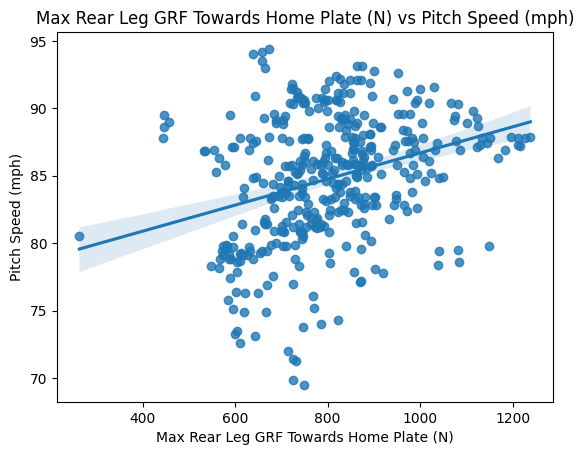

In [19]:
p = sns.regplot(x="rear_grf_x_max", y="pitch_speed_mph", data=data)
p.set(xlabel ="Max Rear Leg GRF Towards Home Plate (N)", ylabel = "Pitch Speed (mph)", title ="Max Rear Leg GRF Towards Home Plate (N) vs Pitch Speed (mph)")

We now see a slighty more positive relationship when compared to the magnitude.

### Lead Leg GRF and Pitch Speed

Lead leg grf is the amount of force applied to the lead leg from the ground. The lead leg is the one that stops the body from moving towards home plate. For a right handed pitcher, this will be the left leg. Let's now see this relation in a graph.

[Text(0.5, 0, 'Max Mag Lead Leg GRF (N)'),
 Text(0, 0.5, 'Pitch Speed (mph)'),
 Text(0.5, 1.0, 'Max Mag Lead Leg GRF (N) vs Pitch Speed (mph)')]

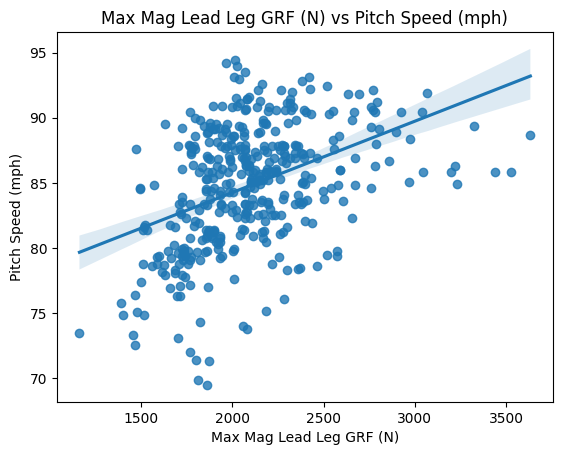

In [20]:
p = sns.regplot(x="lead_grf_mag_max", y="pitch_speed_mph", data=data)
p.set(xlabel ="Max Mag Lead Leg GRF (N)", ylabel = "Pitch Speed (mph)", title ="Max Mag Lead Leg GRF (N) vs Pitch Speed (mph)")

This graph shows a positive relationship between the maximum magnitude of lead leg grf and pitch speed. This means the same as the previous, as there is more force, pitch speed goes up. Although there is a difference from the previous graphs. The slope for this one is a lot larger than the others. The more force that is applied to the lead leg has a larger effect of increasing pitch than the force on the rear leg.

### Momentum

Momentum is the quantity of motion of a moving body, measured as a product of its mass and velocity. We can calculate the max mometum in the direction of home plate by multiplying the mass of the thrower and their velocity of center of gravity towards home plate.

We need to get the weight of the athlete. The weight is in the metadata table, so we need to join those two tables:

In [21]:
pitching_metadata = pd.read_csv("./data/metadata.csv")

pitching_full = pd.merge(data, pitching_metadata, on="session_pitch")

Now, let's add a column of of maximum momentum towards home plate.

In [22]:
pitching_full["max_momentum_x"] = pitching_full["session_mass_kg"] * pitching_full["max_cog_velo_x"]

The following graph will show the relationship between momentum and lead leg grf:

[Text(0.5, 0, 'Max Momentum Towards Home Plate (kg m/s)'),
 Text(0, 0.5, 'Max Mag Lead Leg GRF (N)'),
 Text(0.5, 1.0, 'Max Momentum Towards Home Plate (kg m/s) vs Max Mag Lead Leg GRF (N)')]

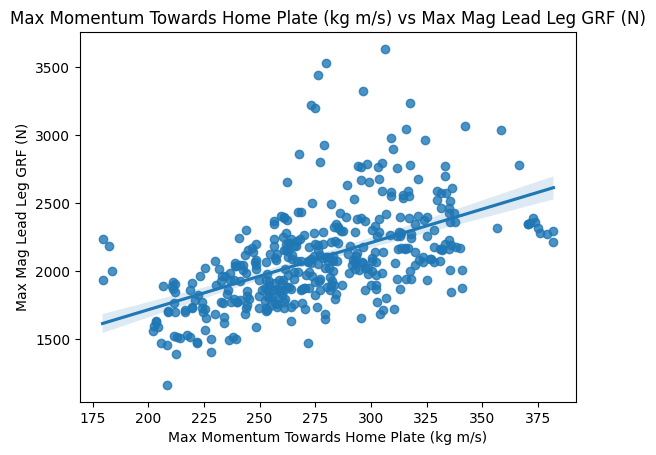

In [25]:
p = sns.regplot(x="max_momentum_x", y="lead_grf_mag_max", data=pitching_full)
p.set(xlabel ="Max Momentum Towards Home Plate (kg m/s)", ylabel = "Max Mag Lead Leg GRF (N)", title ="Max Momentum Towards Home Plate (kg m/s) vs Max Mag Lead Leg GRF (N)")

This graph shows a positive relationship between momentum and lead leg grf. This means that as we increase momentum, we also increase lead leg grf. This seems to make logical sense, because as an athlete moves with more energy, this allows more energy to be put into the ground, thus making the grf on the lead leg increase. Now, lets see how to increase momentum. Increasing momentum can be achieved by either increasing mass or velocity. This can be done by having the athlete gain weight, and/or by having the athlete move faster towards home plate.

Let's now see the relationship between the rear leg grf and cog velocity.

[Text(0.5, 0, 'Max Mag Rear Leg GRF (N)'),
 Text(0, 0.5, 'Max COG Velocity Towards Home Plate (m/s)'),
 Text(0.5, 1.0, 'Max Mag Rear Leg GRF (N) vs Max COG Velocity Towards Home Plate (m/s)')]

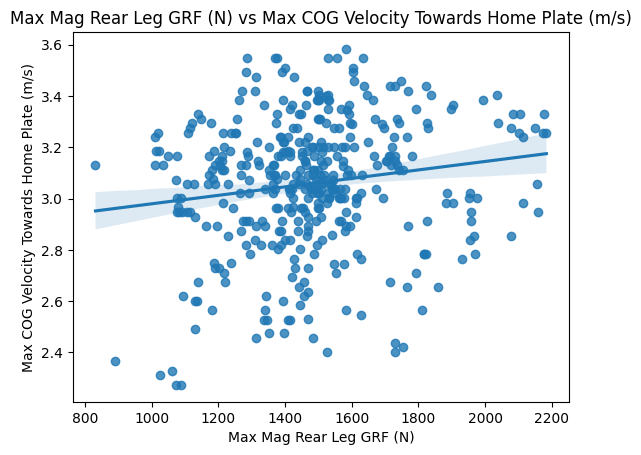

In [26]:
p = sns.regplot(x="rear_grf_mag_max", y="max_cog_velo_x", data=pitching_full)
p.set(xlabel ="Max Mag Rear Leg GRF (N)", ylabel = "Max COG Velocity Towards Home Plate (m/s)", title ="Max Mag Rear Leg GRF (N) vs Max COG Velocity Towards Home Plate (m/s)")

There's a slight positive relationship between max cog towards home plate and max mag of rear leg grf. Let's now see if there is a stronger relationship of the rear leg grf in the direction of home plate.

[Text(0.5, 0, 'Max Rear Leg GRF Towards Home Plate (N)'),
 Text(0, 0.5, 'Max COG Velocity Towards Home Plate (m/s)'),
 Text(0.5, 1.0, 'Max Rear Leg GRF Towards Home Plate (N) vs Max COG Velocity Towards Home Plate (m/s)')]

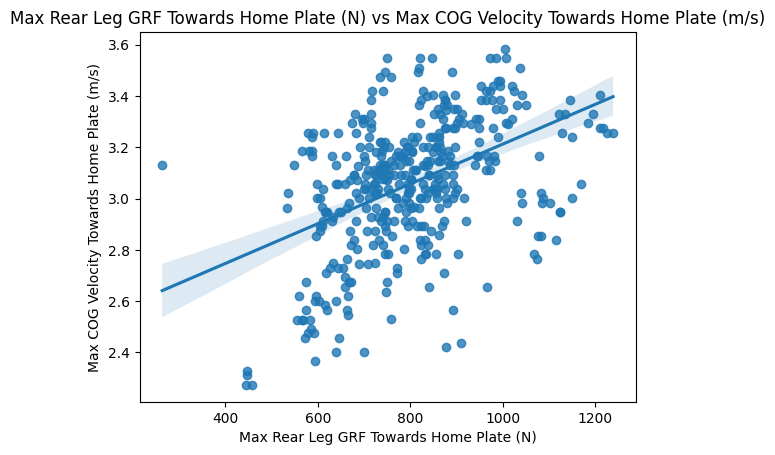

In [27]:
p = sns.regplot(x="rear_grf_x_max", y="max_cog_velo_x", data=pitching_full)
p.set(xlabel ="Max Rear Leg GRF Towards Home Plate (N)", ylabel = "Max COG Velocity Towards Home Plate (m/s)", title ="Max Rear Leg GRF Towards Home Plate (N) vs Max COG Velocity Towards Home Plate (m/s)")

This relationship is a lot more positive than the last. This means that to increase cog velocity, the thrower should not just have grf on the rear leg, but it should be in the direction of home plate in order for it to have a larger effect on cog velocity.

## Conclusion

From the analysis, we found that lead leg grf has a large effect on the pitch speed, and that as there is more force, pitch speed increases. We then looked momentum and and its relation to lead leg grf. It showed that if there is more momentum, we get more lead leg grf. Also, if we want to increase momentum, we need to increase the athletes weight, and/or their center of gravity velocity towards home plate. Lasty, we saw that in order to increase the cog velocity towards home plate, the athlete needs to increase the rear leg grf towards home plate.

Now that analysis is over, what are some take aways that can be actionable for an athlete? One that comes to mind is the rear leg grf in the direction of home plate and its relation to momentum. If an athlete wants to increase pitch speed, they can try to have more lead leg grf. To have more lead leg grf, they need to increase momentum, and to increase momentum, the athlete can gain weight or increase center of gravity velocity towards home plate. So, having an athlete gain lean mass can be a way to have them increase pitch speed, as this will increase their momentum. Another would be to have the athlete position their body in a manner in the delivery so that the grf of the rear leg points more in the direction of home plate. This can be done by queing the athlete to drop during the delivery, causing gravity to pull the athlete down (increasing cog velo) as well the force vector of their back foot point more towards second base, increasing the grf of the rear leg in teh direction of home plate.

In conclusion, because we have done an analysis, we now have two modes of action for an athlete to improve their pitch speed, one physical, having the athlete gain lean mass, and one mechanical, having the athlete drop during the delivery.